##Importing Libraries & Dataset

In [1]:
import pandas as pd   #Library for manipualtion and filtering the data.
import numpy as np  #Library for scientific computing.
import matplotlib.pyplot as plt  #Library for Data visualization.
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [2]:
#Importing Credit Card dataset using read_csv in pandas.
df_credit_card = pd.read_csv("Credit_card.csv")

In [3]:
#Importing Credit Card Label dataset using read_csv in pandas.
df_label = pd.read_csv("Credit_card_label.csv")

In [4]:
#Combining common datset using merge on "Ind_ID" column.
df = pd.merge(df_credit_card, df_label, on='Ind_ID', how='inner')

##Statistical Analysis

In [5]:
#"head()" used to get first 5 rows of dataset.
df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [6]:
#"describe()" used to give statistics for numerical parameteric column.
df.describe()

,Ind_ID,CHILDREN,Annual_income,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,label
count,1.548000e+03,1548.000000,1.525000e+03,1526.000000,1548.000000,1548.0,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000
mean,5.078920e+06,0.412791,1.913993e+05,-16040.342071,59364.689922,1.0,0.208010,0.309432,0.092377,2.161499,0.113049
std,4.171759e+04,0.776691,1.132530e+05,4229.503202,137808.062701,0.0,0.406015,0.462409,0.289651,0.947772,0.316755
min,5.008827e+06,0.000000,3.375000e+04,-24946.000000,-14887.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
25%,5.045070e+06,0.000000,1.215000e+05,-19553.000000,-3174.500000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
50%,5.078842e+06,0.000000,1.665000e+05,-15661.500000,-1565.000000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
75%,5.115673e+06,1.000000,2.250000e+05,-12417.000000,-431.750000,1.0,0.000000,1.000000,0.000000,3.000000,0.000000
max,5.150412e+06,14.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,15.000000,1.000000


In [7]:
#"nunique()" used to distinct values in each column in dataset.
df.nunique()

Ind_ID             1548
GENDER                2
Car_Owner             2
Propert_Owner         2
CHILDREN              6
Annual_income       115
Type_Income           4
EDUCATION             5
Marital_status        5
Housing_type          6
Birthday_count     1270
Employed_days       956
Mobile_phone          1
Work_Phone            2
Phone                 2
EMAIL_ID              2
Type_Occupation      18
Family_Members        7
label                 2
dtype: int64

In [8]:
#"isnull().sum()" give total null values in each column in dataset.
df.isnull().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

In [9]:
#"isnull().sum().sum()" gives total null values.
df.isnull().sum().sum()

540

##Exploratory Data Analysis

####Analysis

In [10]:
#Replacing the "Male" to 1 and "Female" to 0.
df["GENDER"] = df["GENDER"].replace("M",1)
df["GENDER"] = df["GENDER"].replace("F",0)

In [11]:
#Replacing the "Yes" to 1 and "No" to 0.
df["Car_Owner"] = df["Car_Owner"].replace("Y",1)
df["Car_Owner"] = df["Car_Owner"].replace("N",0)

In [12]:
#Replacing the "Yes" to 1 and "No" to 0.
df["Propert_Owner"] = df["Propert_Owner"].replace("Y",1)
df["Propert_Owner"] = df["Propert_Owner"].replace("N",0)

In [13]:
#Droping some columns which are not relevant for the analysis and prediction.
df.drop(["Ind_ID", "Mobile_phone", "Work_Phone", "Phone", "EMAIL_ID", "Type_Occupation"], axis=1, inplace=True)

*   In the dataset, there are some negative values in which needs to be converted.
*   "Birthday_count" and "Employed_days" columns need to converted into years with positive value in it.

In [14]:
#Renaming the "Birthday_count" to "Age" by dividing 365.
df.rename(columns = {"Birthday_count" : "Age"}, inplace=True) 
df["Age"] = round(abs(df["Age"]/365))

In [15]:
#Renaming the "Employed_days" to "Experience" by dividing 365.
df.rename(columns = {"Employed_days" : "Experience"}, inplace=True) 
df["Experience"] = round(abs(df["Experience"]/365),1)

In [16]:
#Extracting out the values count in each column using loop and "value_counts()".
for i in df.columns:
  print(df[i].value_counts())
  print("-------------------")

0.0    973
1.0    568
Name: GENDER, dtype: int64
-------------------
0    924
1    624
Name: Car_Owner, dtype: int64
-------------------
1    1010
0     538
Name: Propert_Owner, dtype: int64
-------------------
0     1091
1      305
2      134
3       16
4        1
14       1
Name: CHILDREN, dtype: int64
-------------------
135000.0    170
112500.0    144
180000.0    137
157500.0    125
225000.0    119
           ... 
119700.0      1
69372.0       1
37800.0       1
333000.0      1
69750.0       1
Name: Annual_income, Length: 115, dtype: int64
-------------------
Working                 798
Commercial associate    365
Pensioner               269
State servant           116
Name: Type_Income, dtype: int64
-------------------
Secondary / secondary special    1031
Higher education                  426
Incomplete higher                  68
Lower secondary                    21
Academic degree                     2
Name: EDUCATION, dtype: int64
-------------------
Married                 104

####Missing Values

In [17]:
#Droping the duplicates row from the dataset.
df.drop_duplicates(inplace=True)

In [18]:
#After removing duplicates, we are left with 1380 records with 13 features.
df.shape

(1380, 13)

In [19]:
#Dropping the null rows from all the records.
df.dropna(inplace=True)

In [20]:
#After dropping, we are left with 1328 records with 13 features.
df.shape

(1328, 13)

####Dealing with Outliers.

#####Age

In [21]:
q3_age = df["Age"].quantile(0.75)
q1_age = df["Age"].quantile(0.25)
iqr_age = q3_age - q1_age
upper_age = q3_age + (1.5*iqr_age)
inner_age = q1_age - (1.5*iqr_age)
df.drop(df[(df["Age"]>upper_age)].index, inplace=True)
df.drop(df[(df["Age"]<inner_age)].index, inplace=True)

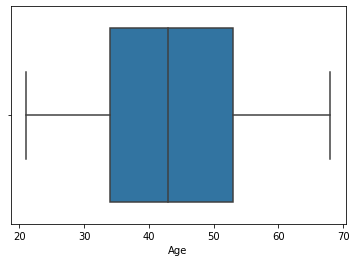

In [22]:
sns.boxplot(df["Age"])
plt.show()

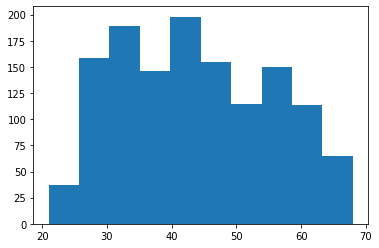

In [23]:
plt.hist(df["Age"])
plt.show()

#####Children

In [24]:
q3_child = df["CHILDREN"].quantile(0.75)
q1_child = df["CHILDREN"].quantile(0.25)
iqr_child = q3_child - q1_child
upper_child = q3_child + (1.5*iqr_child)
lower_child = q1_child - (1.5*iqr_child)
df.drop(df[(df["CHILDREN"]>upper_child)].index, inplace=True)
df.drop(df[(df["CHILDREN"]<lower_child)].index, inplace=True)

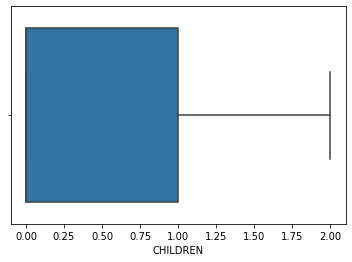

In [25]:
sns.boxplot(df["CHILDREN"])
plt.show()

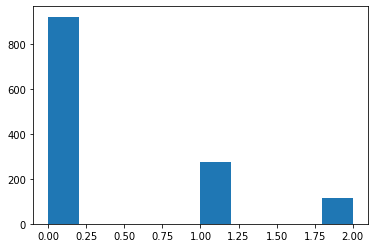

In [26]:
plt.hist(df["CHILDREN"])
plt.show()

#####Family Members

In [27]:
q3_fam = df["Family_Members"].quantile(0.75)
q1_fam = df["Family_Members"].quantile(0.25)
iqr_fam = q3_fam - q1_fam
upper_fam_member = q3_fam + (1.5*iqr_fam)
lower_fam_member = q1_fam - (1.5*iqr_fam)
df.drop(df[(df["Family_Members"]>upper_fam_member)].index, inplace=True)

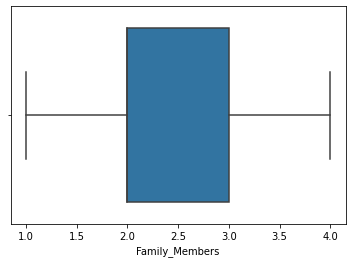

In [28]:
sns.boxplot(df["Family_Members"])
plt.show()

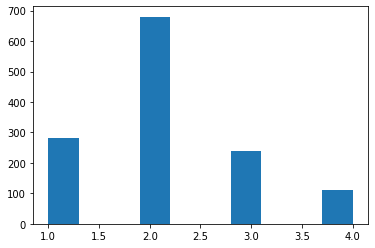

In [29]:
plt.hist(df["Family_Members"])
plt.show()

#####Experience

In [30]:
q3_exp = df["Experience"].quantile(0.75)
q1_exp = df["Experience"].quantile(0.25)
iqr_exp = q3_exp - q1_exp
upper_exp = q3_exp + (1.5*iqr_exp)
lower_exp = q1_exp - (1.5*iqr_exp)
df.drop(df[df["Experience"]>upper_exp].index, inplace=True)

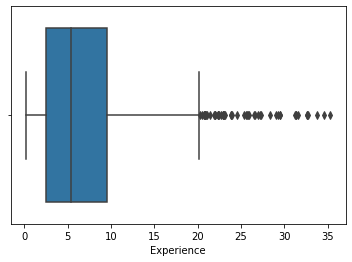

In [31]:
sns.boxplot(df["Experience"])
plt.show()

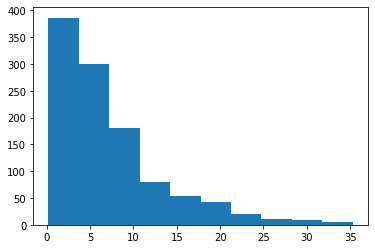

In [32]:
plt.hist(df["Experience"])
plt.show()

####Insights

Univariate Analysis

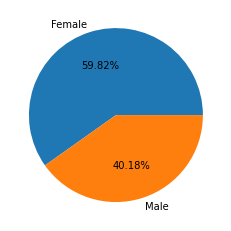

In [34]:
plt.pie(df["GENDER"].value_counts(), labels=["Female", "Male"], autopct='%1.2f%%')
plt.show()

<AxesSubplot:xlabel='Annual_income', ylabel='Count'>

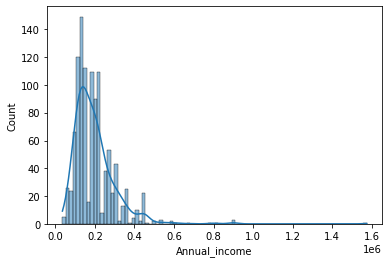

In [35]:
sns.histplot(df["Annual_income"], kde = True)

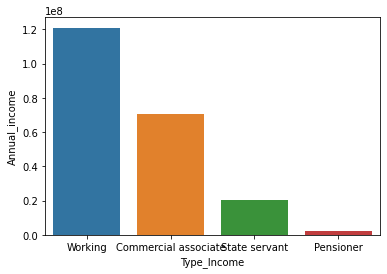

In [36]:
cat = df[["Type_Income", "Annual_income"]].groupby(['Type_Income'], as_index=False).sum().sort_values(by='Annual_income', ascending=False)
sns.barplot(x = "Type_Income", y = "Annual_income", data = cat)
plt.show()

<AxesSubplot:xlabel='Family_Members', ylabel='Annual_income'>

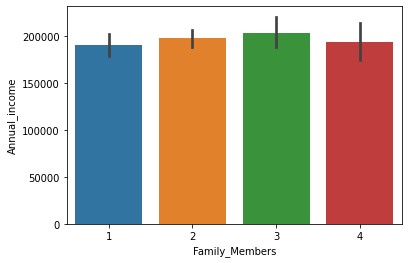

In [37]:
sns.barplot(x = "Family_Members", y = "Annual_income", data = df)

Bivariate Analysis

<AxesSubplot:xlabel='Age', ylabel='Annual_income'>

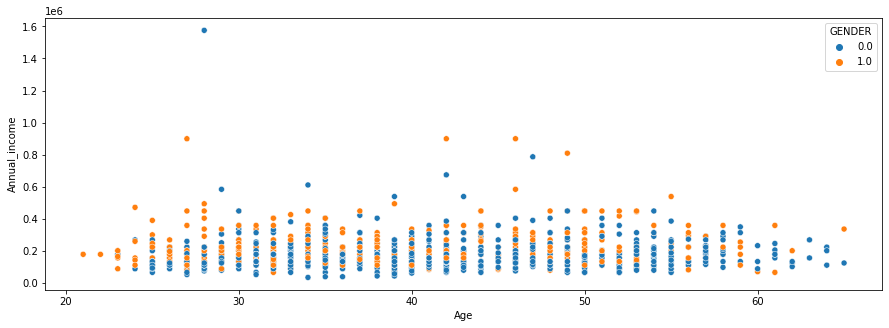

In [38]:
plt.figure(figsize=(15,5))
sns.scatterplot(x = df["Age"], y = df["Annual_income"], hue = df["GENDER"])

<AxesSubplot:xlabel='Age', ylabel='Family_Members'>

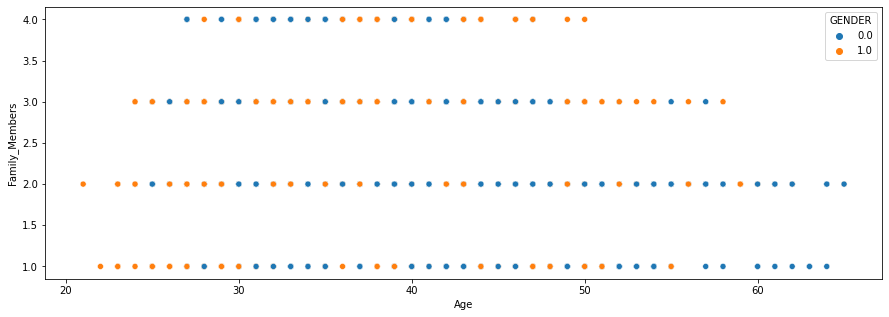

In [39]:
plt.figure(figsize=(15,5))
sns.scatterplot(x = df["Age"], y = df["Family_Members"], hue = df["GENDER"])

<AxesSubplot:xlabel='Age', ylabel='CHILDREN'>

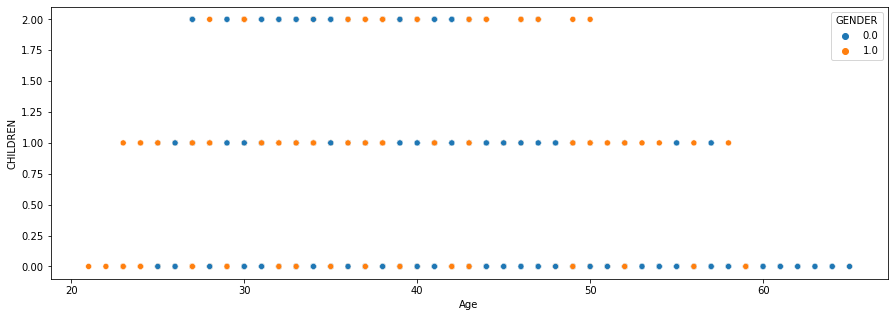

In [40]:
plt.figure(figsize=(15,5))
sns.scatterplot(x = df["Age"], y = df["CHILDREN"], hue = df["GENDER"])

<AxesSubplot:xlabel='Annual_income', ylabel='Experience'>

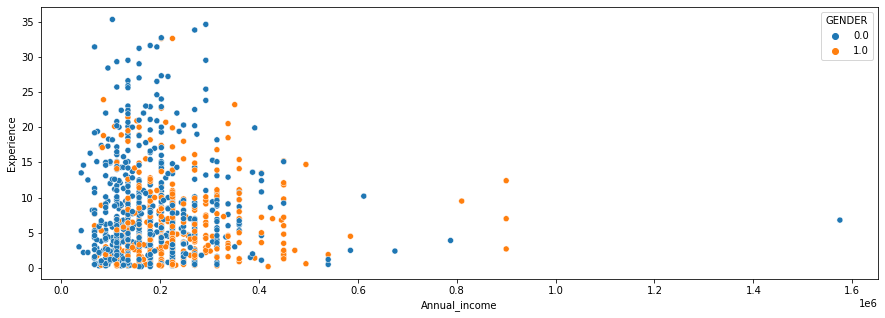

In [41]:
plt.figure(figsize=(15,5))
sns.scatterplot(x = df["Annual_income"], y = df["Experience"], hue = df["GENDER"])

##Model Building

In [43]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

####Feature Scaling

In [44]:
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

X = preprocessor.fit_transform(X)

####Splitting data into Training and Test data

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [46]:
X_train.shape, y_train.shape

((813, 28), (813,))

##Model Selection

####Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
y_pred = log_reg.predict(X_test)
Log_reg_untune = accuracy_score(y_pred, y_test)*100
print("Accuracy of Logistic Regression Model : {}%".format(round(accuracy_score(y_pred, y_test)*100)))
print("Classification Report of Logistic Regression Model : \n",classification_report(y_pred, y_test))

Accuracy of Logistic Regression Model : 93%
Classification Report of Logistic Regression Model : 
               precision    recall  f1-score   support

           0       1.00      0.93      0.96       270
           1       0.10      1.00      0.17         2

    accuracy                           0.93       272
   macro avg       0.55      0.96      0.57       272
weighted avg       0.99      0.93      0.96       272



#####Hyper Parameter Tuning for Logistic Regression

In [48]:
from sklearn.model_selection import GridSearchCV
parameter = {"penalty":["l1", "l2", "elasticnet"],
             "C" : [1,2,3,4,5,6,10,20,40,50],
             "max_iter" : [100,200,300,400,500]}
Classfier_Reg = GridSearchCV(log_reg,param_grid=parameter, scoring="accuracy", cv=10)

In [49]:
Classfier_Reg.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 10, 20, 40, 50],
                         'max_iter': [100, 200, 300, 400, 500],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [50]:
print(Classfier_Reg.best_params_)

{'C': 20, 'max_iter': 100, 'penalty': 'l2'}


In [51]:
print(Classfier_Reg.best_score_)

0.9065492321589883


In [52]:
y_pred_tune_grid = Classfier_Reg.predict(X_test)

In [53]:
Log_reg_tune = accuracy_score(y_pred_tune_grid, y_test)*100
round(accuracy_score(y_pred_tune_grid, y_test)*100)

94

In [54]:
print(classification_report(y_pred_tune_grid, y_test))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97       268
           1       0.19      1.00      0.32         4

    accuracy                           0.94       272
   macro avg       0.60      0.97      0.64       272
weighted avg       0.99      0.94      0.96       272



Verification after tuning

In [55]:
log_reg_tune = LogisticRegression(penalty="l2",C = 4, max_iter=100)
log_reg_tune.fit(X_train,y_train)
y_pred_tune = log_reg_tune.predict(X_test)
print("Accuracy of Logistic Regression Model : {}%".format(round(accuracy_score(y_pred_tune, y_test)*100)))
print("Classification Report of Logistic Regression Model : \n",classification_report(y_pred_tune, y_test))

Accuracy of Logistic Regression Model : 94%
Classification Report of Logistic Regression Model : 
               precision    recall  f1-score   support

           0       1.00      0.94      0.97       268
           1       0.19      1.00      0.32         4

    accuracy                           0.94       272
   macro avg       0.60      0.97      0.64       272
weighted avg       0.99      0.94      0.96       272



###Decision Tree Classifier

In [56]:
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train,y_train)
y_pred_dec = dec_tree.predict(X_test)
dec_tree_untune = accuracy_score(y_pred_dec, y_test)*100
accuracy_score(y_pred_dec, y_test)*100

84.92647058823529

In [57]:
# from sklearn import tree
# tree.plot_tree(dec_tree)

#####Hyper Parameter Tuning for Decision Tree Classifier

In [58]:
from sklearn.model_selection import GridSearchCV
parameter_dtc = {"criterion" : ["gini", "entropy", "log_loss"],
                 "splitter" : ["best", "random"],
                 "max_depth" : [1,2,3,4,5],
                 "max_features" : ["auto", "sqrt", "log2"],
                 "ccp_alpha" : [1,2,3,4,5,6,7]}
Classfier_dtc = GridSearchCV(dec_tree,param_grid=parameter_dtc, scoring="accuracy", cv=5)

In [59]:
Classfier_dtc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': [1, 2, 3, 4, 5, 6, 7],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [60]:
print(Classfier_dtc.best_params_)

{'ccp_alpha': 1, 'criterion': 'gini', 'max_depth': 1, 'max_features': 'auto', 'splitter': 'best'}


In [61]:
print(Classfier_dtc.best_score_)

0.9065212451715519


In [62]:
y_pred_tune_dtc = Classfier_dtc.predict(X_test)

In [63]:
dec_tree_tune = accuracy_score(y_pred_tune_dtc, y_test)*100
accuracy_score(y_pred_tune_dtc, y_test)*100

92.27941176470588

In [64]:
print(classification_report(y_pred_tune_dtc, y_test))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96       272
           1       0.00      0.00      0.00         0

    accuracy                           0.92       272
   macro avg       0.50      0.46      0.48       272
weighted avg       1.00      0.92      0.96       272



###KNN

In [65]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)
knn_untune = accuracy_score(y_pred_knn, y_test)*100
accuracy_score(y_pred_knn, y_test)*100

91.54411764705883

#####Hyper Parameter Tuning for KNN

In [66]:
from sklearn.model_selection import GridSearchCV
parameter_knn = {"n_neighbors" : list(np.arange(1,30,1)),
                 "weights" : ["uniform", "distance"],
                 "algorithm" : ["auto", "ball_tree", "kd_tree", "brute"]}
Classfier_knn = GridSearchCV(knn,param_grid=parameter_knn, scoring="accuracy", cv=5)

In [67]:
Classfier_knn.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [68]:
print(Classfier_knn.best_params_)

{'algorithm': 'auto', 'n_neighbors': 10, 'weights': 'uniform'}


In [69]:
print(Classfier_knn.best_score_)

0.9065212451715519


In [70]:
y_pred_tune_knn = Classfier_knn.predict(X_test)

In [71]:
knn_tune = accuracy_score(y_pred_tune_knn, y_test)*100
accuracy_score(y_pred_tune_knn, y_test)*100

92.27941176470588

In [72]:
print(classification_report(y_pred_tune_knn, y_test))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96       272
           1       0.00      0.00      0.00         0

    accuracy                           0.92       272
   macro avg       0.50      0.46      0.48       272
weighted avg       1.00      0.92      0.96       272



###Random Forest Classifier

In [73]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier()
random_forest.fit(X_train,y_train)
y_pred_rfc = random_forest.predict(X_test)
random_forest_untune = accuracy_score(y_pred_rfc, y_test)*100
accuracy_score(y_pred_rfc, y_test)*100

91.91176470588235

#####Hyper Parameter Tuning for Random Forest Classifier

In [74]:
from sklearn.model_selection import GridSearchCV
parameter_rfc = {"n_estimators" : list(np.arange(10,15,1)),
                 "criterion" : ["gini", "entropy", "log_loss"],
                 "max_depth" : list(np.arange(0,14))}
Classfier_rfc = GridSearchCV(random_forest,param_grid=parameter_rfc, scoring="accuracy", cv=5)

In [75]:
Classfier_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13],
                         'n_estimators': [10, 11, 12, 13, 14]},
             scoring='accuracy')

In [76]:
print(Classfier_rfc.best_params_)

{'criterion': 'gini', 'max_depth': 13, 'n_estimators': 13}


In [77]:
print(Classfier_rfc.best_score_)

0.9089752329016132


In [78]:
y_pred_tune_rfc = Classfier_rfc.predict(X_test)

In [79]:
random_forest_tune = accuracy_score(y_pred_tune_rfc, y_test)*100
accuracy_score(y_pred_tune_rfc, y_test)*100

91.54411764705883

In [80]:
print(classification_report(y_pred_tune_rfc, y_test))

              precision    recall  f1-score   support

           0       0.98      0.93      0.96       266
           1       0.10      0.33      0.15         6

    accuracy                           0.92       272
   macro avg       0.54      0.63      0.55       272
weighted avg       0.96      0.92      0.94       272



###XGBoost

In [81]:
from sklearn.ensemble import GradientBoostingClassifier
grad_boost = GradientBoostingClassifier()
grad_boost.fit(X_train,y_train)
y_pred_gbc = grad_boost.predict(X_test)
grad_boost_untune = accuracy_score(y_pred_gbc, y_test)*100
accuracy_score(y_pred_gbc, y_test)*100

91.91176470588235

###SVM

In [82]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train,y_train)
y_pred_svm = svm.predict(X_test)
svm_untune = accuracy_score(y_pred_svm, y_test)*100
accuracy_score(y_pred_svm, y_test)*100

92.27941176470588

#####Hyper Parameter Tuning for SVC

In [83]:
from sklearn.model_selection import GridSearchCV
parameter_svm = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf', 'poly', 'sigmoid']}
Classfier_svm = GridSearchCV(svm,param_grid=parameter_svm,refit=True, verbose=2)

In [84]:
Classfier_svm.fit(X_train, y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.1s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.1s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, k

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=2)

In [85]:
print(Classfier_svm.best_params_)

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}


In [86]:
print(Classfier_svm.best_estimator_)

SVC(C=1000, gamma=0.001)


In [87]:
print(Classfier_svm.best_score_)

0.910202226766644


In [88]:
y_pred_tune_svm = Classfier_svm.predict(X_test)

In [89]:
svm_tune = accuracy_score(y_pred_tune_svm, y_test)*100
accuracy_score(y_pred_tune_svm, y_test)*100

93.75

In [90]:
print(classification_report(y_pred_tune_svm, y_test))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97       268
           1       0.19      1.00      0.32         4

    accuracy                           0.94       272
   macro avg       0.60      0.97      0.64       272
weighted avg       0.99      0.94      0.96       272



#Accuracy : Graph

#####Untuned Algorithm Graph

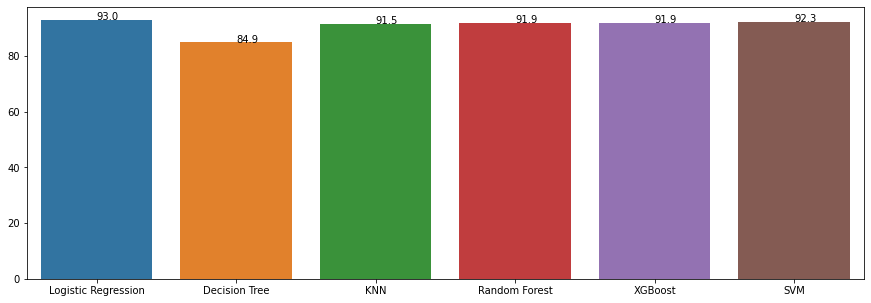

In [94]:
untuned_algo = [Log_reg_untune, dec_tree_untune, knn_untune, random_forest_untune, grad_boost_untune, svm_untune]
Algo_value_untune = []
for i in untuned_algo:
  Algo_value_untune.append(round(i,1))
Algo = ["Logistic Regression", "Decision Tree" , "KNN", "Random Forest", "XGBoost", "SVM"]
plt.figure(figsize=(15,5))
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])
sns.barplot(Algo,untuned_algo)
addlabels(Algo, Algo_value_untune)

#####Tuned Algorithm Graph

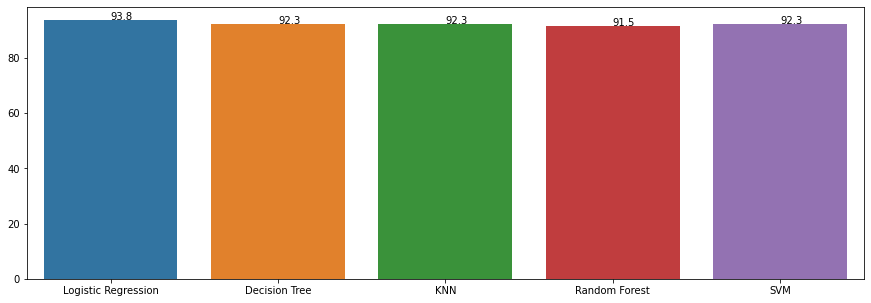

In [95]:
tuned_algo = [Log_reg_tune, dec_tree_tune, knn_tune, random_forest_tune, svm_untune]
Algo_value_tune = []
for i in tuned_algo:
  Algo_value_tune.append(round(i,1))
Algo = ["Logistic Regression", "Decision Tree" , "KNN", "Random Forest", "SVM"]
plt.figure(figsize=(15,5))
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])
sns.barplot(Algo,tuned_algo)
addlabels(Algo, Algo_value_tune)